# Relatório Projeto 4 - IIA #

## Grupo 05 ##

### Alunos: ###

Sara Graça nº52804 \
João Marto nº52818 \
Diogo Matos nº52808

**Etapa 1: carregar o conjunto de dados**

Aqui foram importados os métodos necessários e foi carregada a data através do método load_data. \
Neste método metemos o ficheiro `airline.csv` como argumento para retirar os dados dentro do ficheiro e para mais tarde "treinarmos" a nossa árvore, o testdata deixámos a false porque nesta fase estamos a tratar do treinamento ou seja vamos ter presente a coluna satisfaction.

In [5]:
from sklearn.tree import DecisionTreeClassifier, plot_tree # árvore de decisão
from sklearn.neighbors import KNeighborsClassifier # k-NN
from sklearn.model_selection import train_test_split, cross_val_score # cross-validation
import numpy as np 
import matplotlib.pyplot as plt # gráficos
from utilsAA import *

data, target, feature_names, target_names = load_data('airline.csv')

**Etapa 2: processar os dados**

Verificámos se os dados do ficheiro retirados na etapa 1 estavam corretos e tratámos deles.

In [6]:
data[:,1] = encode_feature(data[:,1]) 
data[:,2] = encode_feature(data[:,2])
data[:,4] = encode_feature(data[:,4])  
data[:,5] = encode_feature(data[:,5])
data[:,7] = encode_feature(data[:,7])
data[:,8] = encode_feature(data[:,8])
data[:,9] = encode_feature(data[:,9])
data[:,10] = encode_feature(data[:,10])
data[:,11] = encode_feature(data[:,11])
data[:,12] = encode_feature(data[:,12])
data[:,13] = encode_feature(data[:,13])
data[:,14] = encode_feature(data[:,14])
data[:,15] = encode_feature(data[:,15])
data[:,16] = encode_feature(data[:,16])
data[:,17] = encode_feature(data[:,17])
data[:,18] = encode_feature(data[:,18])

target_names = ["satisfied","neutral or dissatisfied"]
print(feature_names)
print(data[:5])

['Client id' 'Gender' 'Customer Type' 'Age' 'Type of Travel' 'Class'
 'Flight Distance' 'Inflight wifi service' 'Ease of Online booking'
 'Food and drink' 'Online boarding' 'Seat comfort'
 'Inflight entertainment' 'On-board service' 'Leg room service'
 'Baggage handling' 'Checkin service' 'Inflight service' 'Cleanliness']
[[29 1.0 0.0 22 1.0 1.0 2342 3.0 3.0 3.0 3.0 0.0 2.0 1.0 4.0 2.0 3.0 1.0
  2.0]
 [100 0.0 0.0 16 1.0 1.0 332 2.0 2.0 3.0 2.0 3.0 2.0 4.0 4.0 4.0 3.0 3.0
  2.0]
 [124 1.0 0.0 62 1.0 1.0 2521 4.0 4.0 4.0 1.0 0.0 4.0 2.0 5.0 3.0 0.0 3.0
  0.0]
 [351 0.0 0.0 34 0.0 0.0 1825 2.0 2.0 3.0 3.0 4.0 4.0 4.0 4.0 4.0 2.0 4.0
  2.0]
 [416 0.0 0.0 55 0.0 0.0 918 1.0 2.0 5.0 2.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0
  3.0]]


**Etapa 3: procura do melhor modelo**

Nesta etapa procurámos o melhor modelo variando os argumentos na criação da árvore, depois de saber quais os argumentos do melhor modelo de árvore. \
Depois treinámos a árvore com o fit e imprimimos a árvore criada. \
Por fim divimos os dados em treino e teste e treinamos a árvore e o algoritmo k vizinhos mais próximos com os dados de treino e comparámos para entender quão bem o modelo funciona e concluímos que a árvore de decisão tem o modelo melhor.

O melhor modelo encontrado após vários testes durante a execução do trabalho foi: \
max_depth : 6 \
min_samples_split : 14 \
min_samples_leaf : 1

Com um score de: \
CV accuracy: \
	0.7948717948717948 \
	0.9487179487179487 \
	0.9230769230769231 \
	0.9358974358974359 \
	0.9102564102564102 \
	0.9358974358974359 \
	0.8974358974358975 \
	0.8589743589743589 \
	0.8441558441558441 \
	0.948051948051948 \
Average CV accuracy: 0.900 +/- 0.049


Melhor modelo encontrado
CV accuracy:
	0.8205128205128205
	0.9487179487179487
	0.9230769230769231
	0.9230769230769231
	0.9102564102564102
	0.9102564102564102
	0.9102564102564102
	0.8461538461538461
	0.8571428571428571
	0.948051948051948
Average CV accuracy: 0.900 +/- 0.041

Arvore construida:


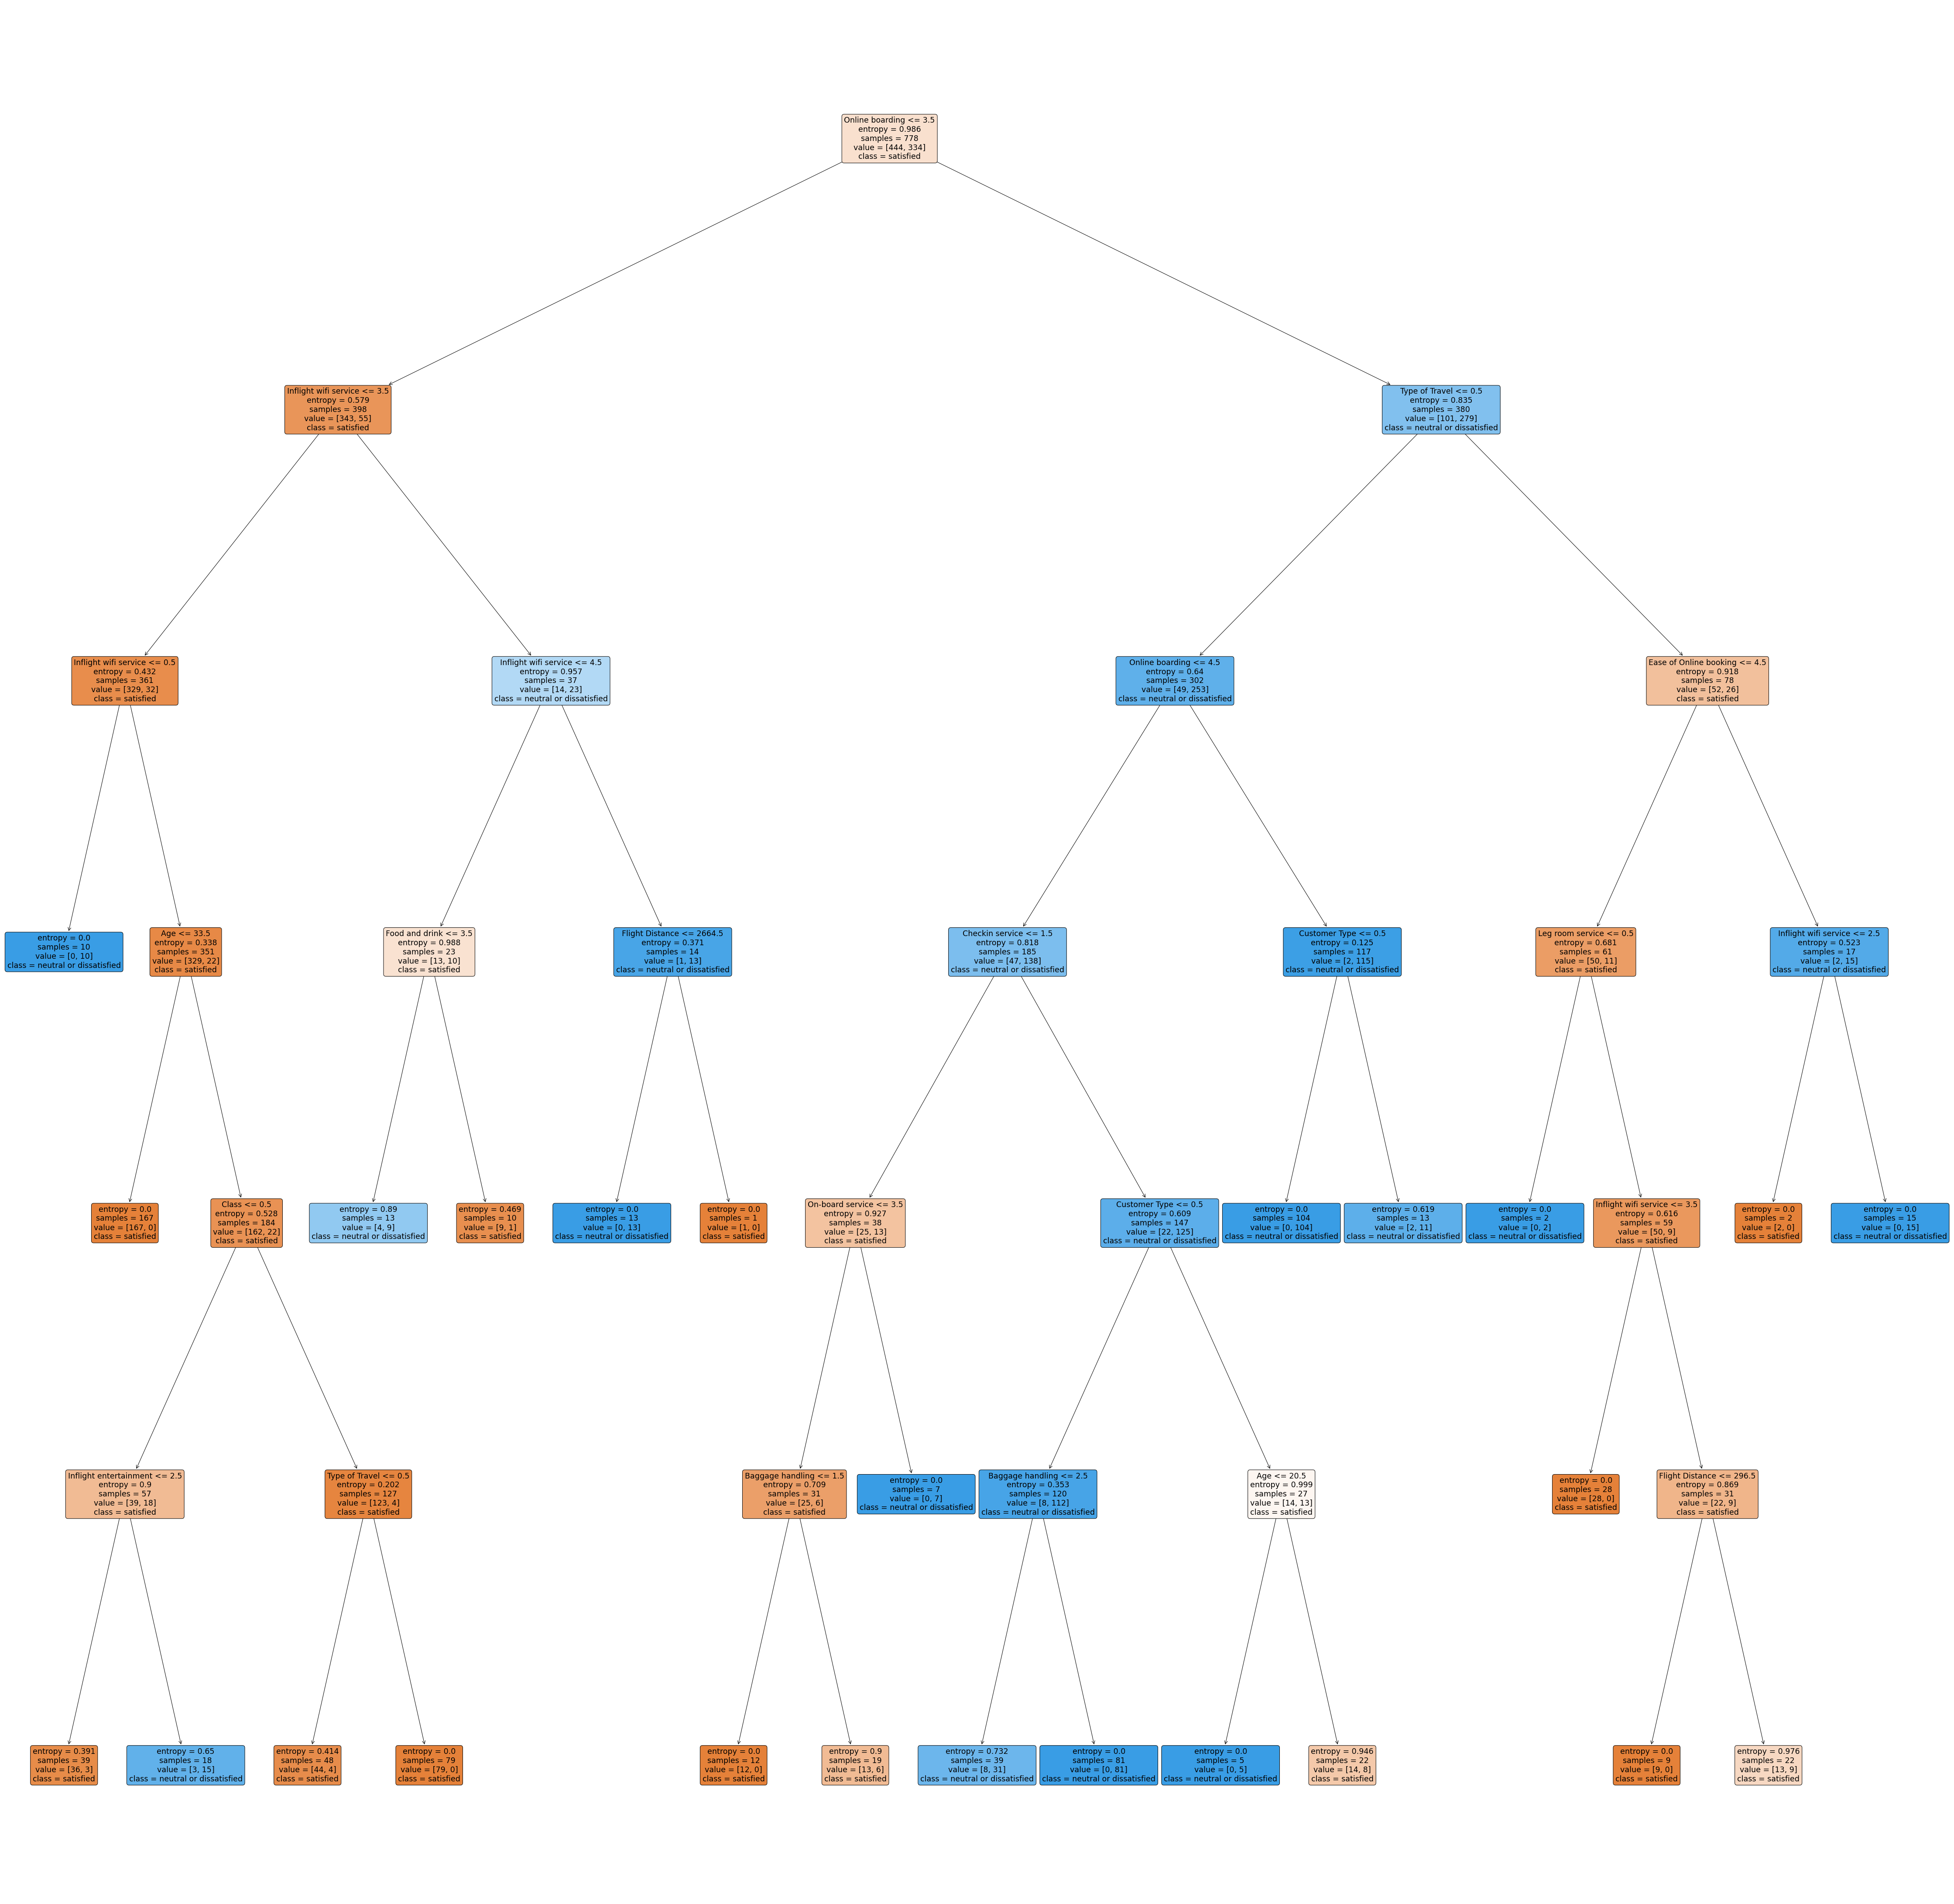

Arvore de decisao:
Accuracy train: 0.9331046312178388
Accuracy test: 0.8871794871794871

k-NN, k=1:
Accuracy train: 1.0
Accuracy test: 0.5641025641025641


In [7]:
# Codigo para descobrir o melhor modelo

# max = 0
# i1, j1, k1 = 0,0,0
# for i in range(1,30) :
#     for j in range(2,40) :
#         for k in range(1,40) :
#             cdt_teste = DecisionTreeClassifier(criterion='entropy', max_depth=i, min_samples_split=j, min_samples_leaf=k)
#             scores = cross_val_score(cdt_teste,
#                                      X=data,
#                                      y=target,
#                                      cv=10,
#                                      n_jobs=-1
#                                     )
#             if max < np.mean(scores) :
#                 max = np.mean(scores)
#                 i1 = i
#                 j1 = j
#                 k1 = k

# print("Melhores argumentos para o modelo de árvore:")
# print("max_depth :", i1)
# print("min_samples_split :", j1)
# print("min_samples_leaf :", k1)
# print("Melhor score encontrado:", max)

print("\nMelhor modelo encontrado")
cdt = DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_split=14, min_samples_leaf=1)
scores = cross_val_score(cdt,
                         X=data,
                         y=target,
                         cv=10,
                         n_jobs=-1
                        )
print('CV accuracy:', *scores, sep='\n\t')
print('Average CV accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

print("\nArvore construida:")
cdt.fit(data, target)
plt.figure(figsize=[80,80])
plot_tree(cdt,
          feature_names=feature_names,
          class_names=target_names,
          filled=True, rounded=True)
plt.show()

X_train, X_test, y_train, y_test = train_test_split(data,
                                                    target,
                                                    random_state=2)

cdt.fit(X_train, y_train)
print('Arvore de decisao:')
print('Accuracy train:', cdt.score(X_train,y_train))
print('Accuracy test:', cdt.score(X_test,y_test))
print()

clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(data,target)
clf.fit(X_train, y_train)
print('k-NN, k=1:')
print('Accuracy train:', clf.score(X_train,y_train))
print('Accuracy test:', clf.score(X_test,y_test))


**Etapa 4: gravar as previsões para o conjunto de teste fornecido**

Aqui começámos por retirar os dados do ficheiro `text.csv` e no argumento testdata a true porque neste caso não temos a coluna satisfaction.

Depois tratámos dos dados como na etapa 2, usámos o método predict com o nosso melhor modelo de árvore e com o método save_data guardámos os dados criados com o predict num ficheiro chamado `IIA2021-proj4-05.csv`.

In [8]:
data1, features_names1 = load_data("test.csv", testdata=True)

data1[:,1] = encode_feature(data1[:,1]) 
data1[:,2] = encode_feature(data1[:,2])
data1[:,4] = encode_feature(data1[:,4])  
data1[:,5] = encode_feature(data1[:,5])
data1[:,7] = encode_feature(data1[:,7])
data1[:,8] = encode_feature(data1[:,8])
data1[:,9] = encode_feature(data1[:,9])
data1[:,10] = encode_feature(data1[:,10])
data1[:,11] = encode_feature(data1[:,11])
data1[:,12] = encode_feature(data1[:,12])
data1[:,13] = encode_feature(data1[:,13])
data1[:,14] = encode_feature(data1[:,14])
data1[:,15] = encode_feature(data1[:,15])
data1[:,16] = encode_feature(data1[:,16])
data1[:,17] = encode_feature(data1[:,17])
data1[:,18] = encode_feature(data1[:,18])

print(features_names1)
print(data1[:5])

array = cdt.predict(data1)

save_data("IIA2021-proj4-05.csv", array)

['Client id' 'Gender' 'Customer Type' 'Age' 'Type of Travel' 'Class'
 'Flight Distance' 'Inflight wifi service' 'Ease of Online booking'
 'Food and drink' 'Online boarding' 'Seat comfort'
 'Inflight entertainment' 'On-board service' 'Leg room service'
 'Baggage handling' 'Checkin service' 'Inflight service' 'Cleanliness']
[[98915 0.0 0.0 26 1.0 1.0 1569 1.0 1.0 2.0 1.0 2.0 2.0 2.0 2.0 3.0 3.0
  3.0 2.0]
 [42606 0.0 0.0 39 1.0 1.0 964 4.0 4.0 1.0 4.0 1.0 1.0 4.0 3.0 3.0 4.0
  3.0 1.0]
 [99566 0.0 0.0 63 1.0 1.0 163 1.0 1.0 2.0 4.0 4.0 0.0 0.0 1.0 0.0 2.0
  0.0 2.0]
 [33105 1.0 1.0 27 0.0 2.0 2454 2.0 2.0 1.0 2.0 1.0 1.0 3.0 1.0 1.0 1.0
  3.0 1.0]
 [60121 0.0 0.0 45 0.0 1.0 421 4.0 3.0 1.0 3.0 3.0 2.0 2.0 4.0 2.0 2.0
  2.0 0.0]]
